In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the dataset
df = pd.read_csv('../data/ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
# Check for missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### Exploratory Data Analysis (EDA)

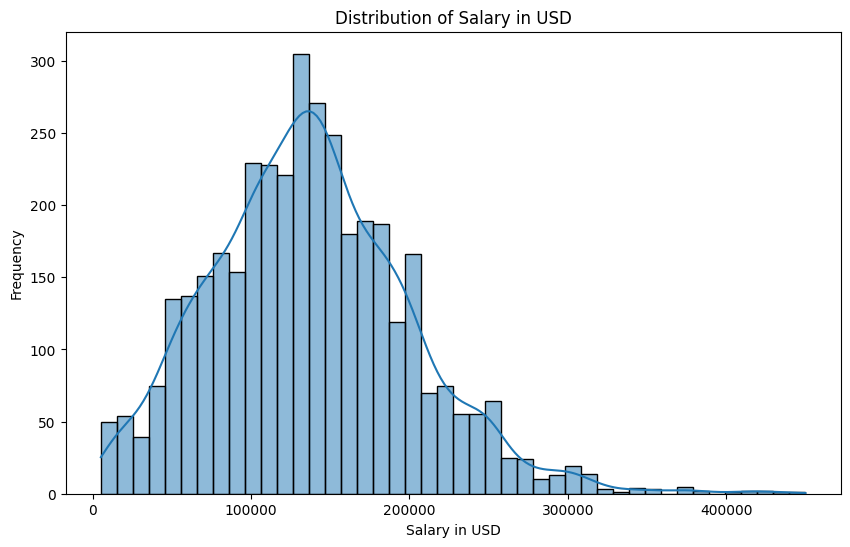

In [7]:
# Distribution of salary_in_usd
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Distribution of Salary in USD")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()

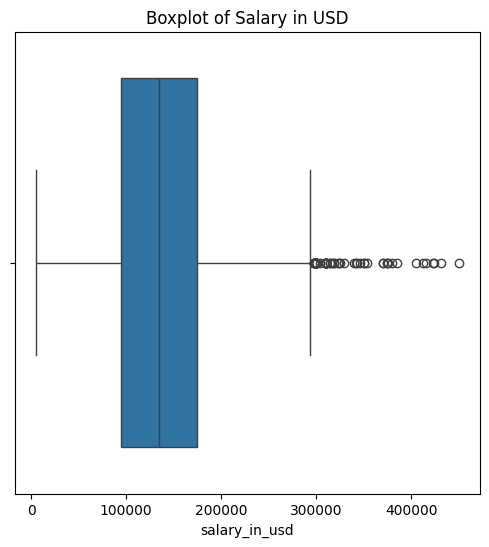

In [8]:
# Example of a quick boxplot for salary_in_usd
plt.figure(figsize=(6,6))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Boxplot of Salary in USD")
plt.show()

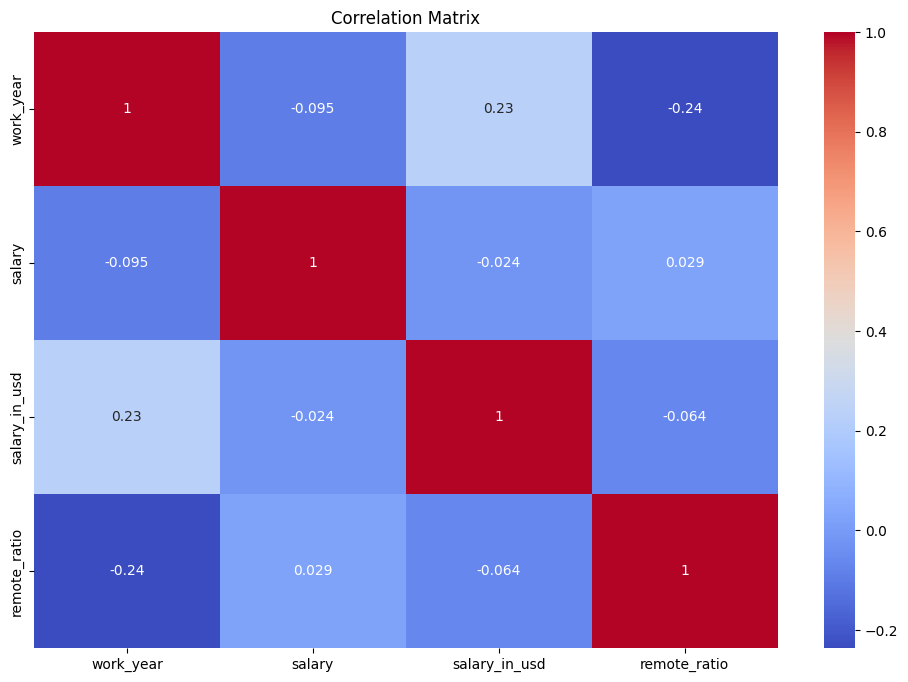

In [9]:
# Correlation matrix for numeric features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
# Explore unique values in categorical columns
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location']
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique(), "\n")

Unique values in experience_level:
['SE' 'MI' 'EN' 'EX'] 

Unique values in employment_type:
['FT' 'CT' 'FL' 'PT'] 

Unique values in job_title:
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Le

#### Data Preprocessing & Feature Engineering

1. **Mapping Ordinal Variables**  

In [11]:
# Map experience_level to ordinal values
experience_map = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df['experience_level_ord'] = df['experience_level'].map(experience_map)

2. **Ensure Numeric Types**  

In [12]:
# Convert remote_ratio to numeric (if not already)
df['remote_ratio'] = pd.to_numeric(df['remote_ratio'], errors='coerce')

3. **One-Hot Encoding for Categorical Features**  

In [13]:
# One-hot encode selected categorical variables (drop_first to avoid multicollinearity)
df_encoded = pd.get_dummies(df, 
                            columns=['employment_type', 'employee_residence', 'company_location'], 
                            drop_first=True)

In [14]:
size_map = {'S': 1, 'M': 2, 'L': 3}
df['company_size_encoded'] = df['company_size'].map(size_map)

In [15]:
# Create a mapping from job_title to the mean salary
job_title_target_map = df.groupby('job_title')['salary_in_usd'].mean()

# Create a new column with the target-encoded values
df['job_title_target_enc'] = df['job_title'].map(job_title_target_map)